In [2]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [3]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X, y = df_iris.iloc[:, 0:4], df_iris.iloc[:, 4]
scaler = StandardScaler()
# transform data


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



sepal length    5.863810
sepal width     3.041905
petal length    3.757143
petal width     1.200952
dtype: float64

In [ ]:
pca = PCA()

In [26]:
df_iris_pca = pd.DataFrame(pca.fit_transform(X))

In [10]:
# Put data in a pandas DataFrame

In [29]:
# Add target and class to DataFrame
df_iris_comp = df_iris_pca.join(df_iris.iloc[:, 4:])
df_iris_comp

,0,1,2,3,target,class
0,-2.684126,0.319397,-0.027915,-0.002262,0,setosa
1,-2.714142,-0.177001,-0.210464,-0.099027,0,setosa
2,-2.888991,-0.144949,0.017900,-0.019968,0,setosa
3,-2.745343,-0.318299,0.031559,0.075576,0,setosa
4,-2.728717,0.326755,0.090079,0.061259,0,setosa
...,...,...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196,2,virginica
146,1.527167,-0.375317,-0.121898,-0.254367,2,virginica
147,1.764346,0.078859,0.130482,-0.137001,2,virginica
148,1.900942,0.116628,0.723252,-0.044595,2,virginica


In [31]:
# Show 10 random samples
df_iris_comp.sample(10)

,0,1,2,3,target,class
114,1.585928,-0.539641,0.629029,-0.329552,2,virginica
62,0.264977,-0.550036,-0.694147,-0.057186,1,versicolor
33,-2.598737,1.093146,0.157811,0.095349,0,setosa
107,2.932587,0.355500,-0.420240,0.257191,2,virginica
7,-2.626145,0.163385,-0.021879,0.045298,0,setosa
100,2.531193,-0.009849,0.760165,0.029056,2,virginica
40,-2.770102,0.263528,0.077248,-0.094063,0,setosa
86,1.220691,0.407620,-0.237167,-0.031217,1,versicolor
76,1.332024,0.244441,-0.521703,-0.035333,1,versicolor
71,0.357888,-0.068925,-0.229854,-0.122998,1,versicolor


# PCA Exercise
Taking in consideration the iris dataset, answer the following questions. **You may have to run some code first :)**
1. How many **principal components can we consider**?
2. How do you think is going to be the **cumulated percentage of explained variance** attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
4. Calculate the **new values** for this decomposition and plot them.
5. Repeat the steps 3 and 4 **taking a 95% of the variance**

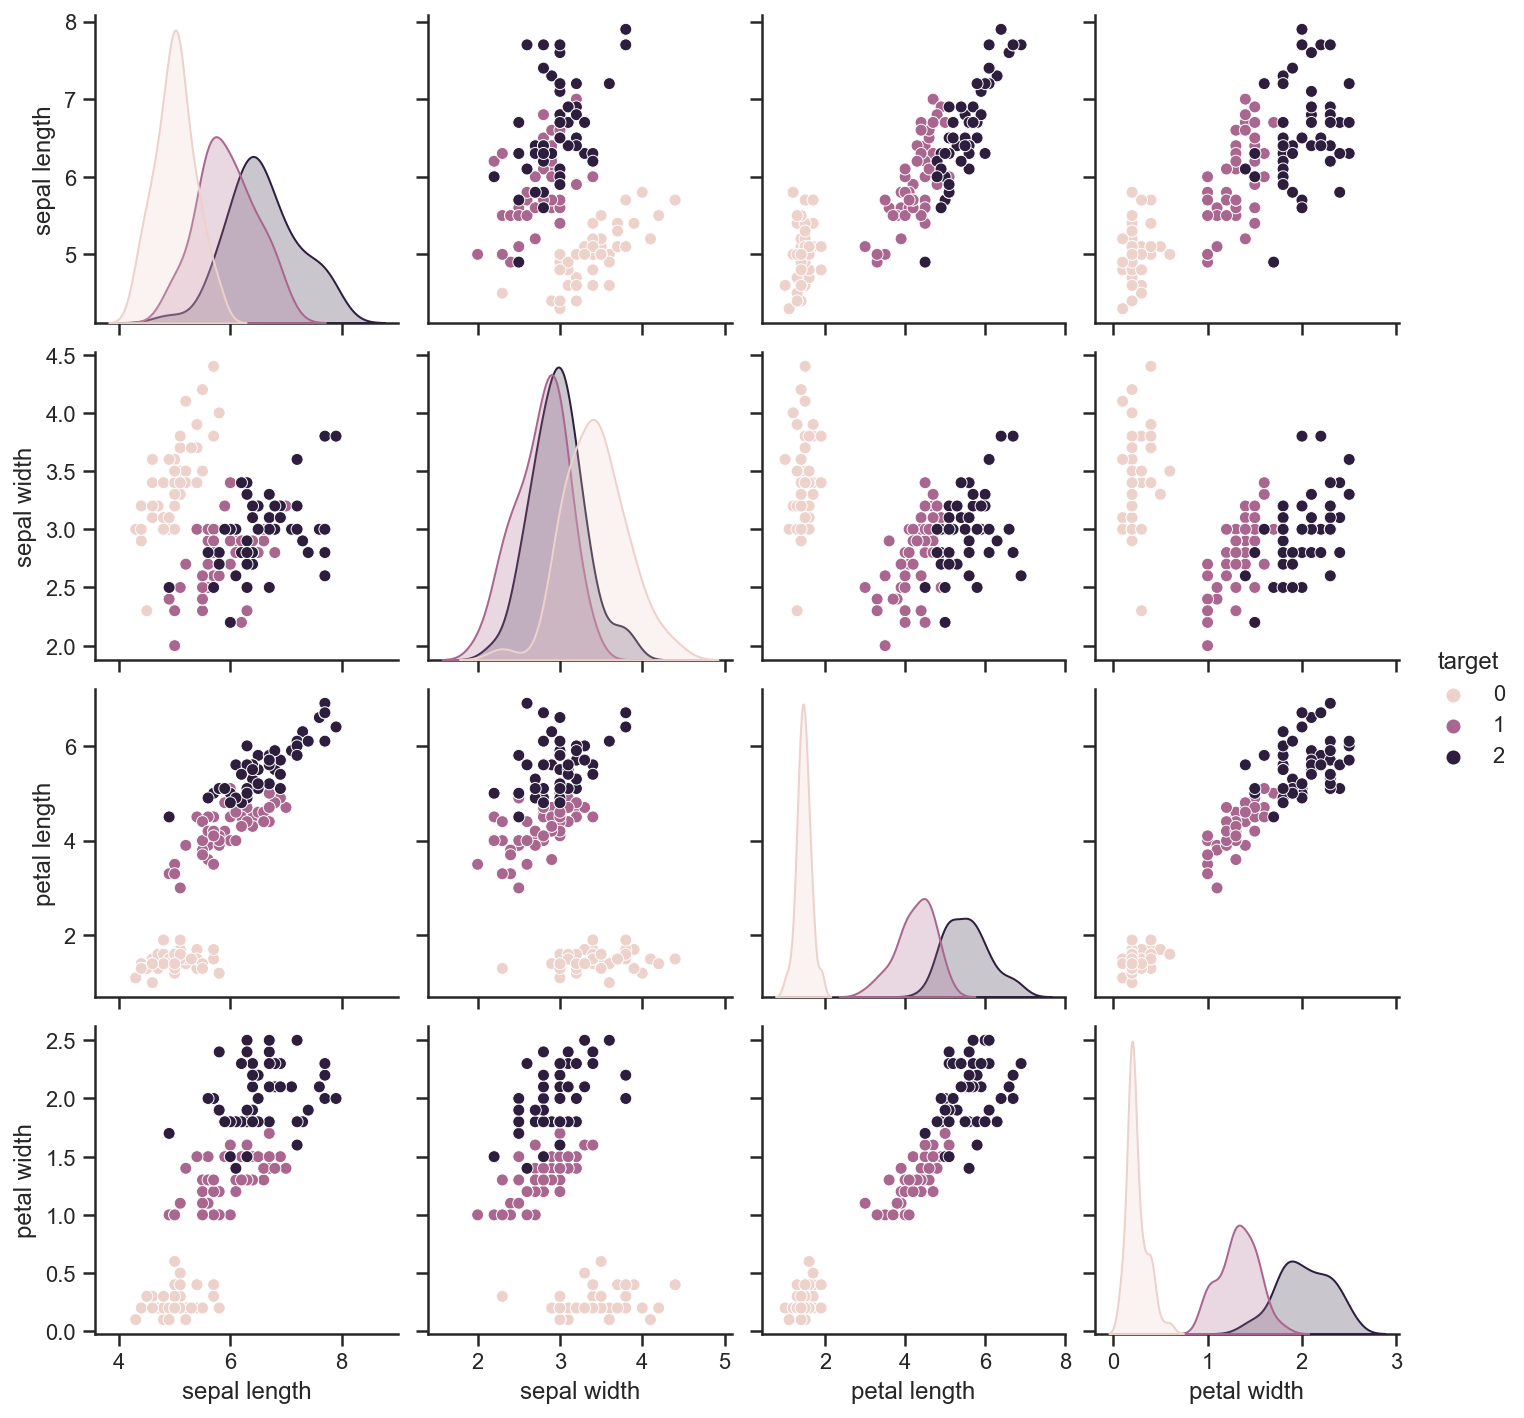

In [13]:
# A graph to help you out
sns.set(style="ticks")
sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

In [54]:
# Run the PCA model here
pca = PCA()

df_iris_pca


,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [38]:
# You should end up with a transformed dataframe

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [56]:
# check the variance in each component
pca.fit(X_train_scaled)
pca_explained = pca.explained_variance_ratio_

In [57]:
cum_pca_explained = np.cumsum(pca_explained)
cum_pca_explained

array([0.72454601, 0.96097116, 0.9951999 , 1.        ])

In [17]:
df_iris.head()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
# check the variance in each component

In [19]:
# compare it with the original dataframe and to what it corresponds (more or less)

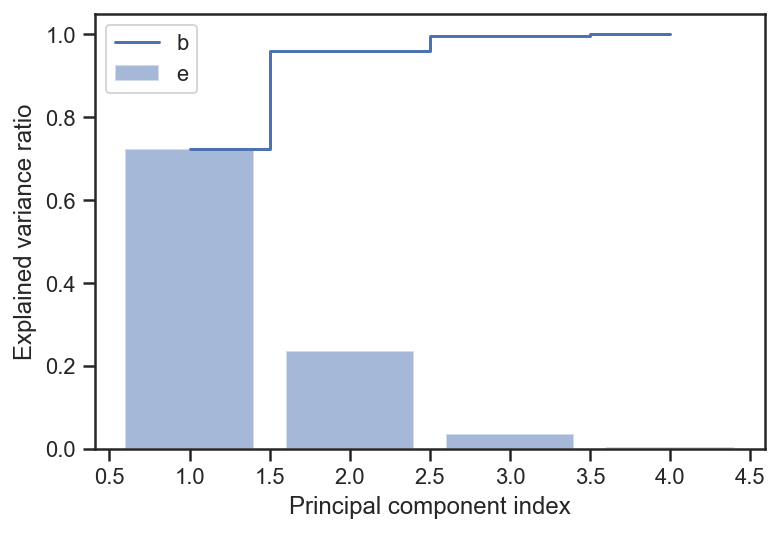

In [62]:
# plot it!
import matplotlib.pyplot as plt

plt.bar(range(1,5), pca_explained, alpha=0.5, align="center", label="individual explained variance")
plt.step(range(1,5), cum_pca_explained, where="mid", label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend("best")